In [55]:
# Question 1
# Import and store the data in a data frame.
## Importing the libraries for the analysis


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Read the dataset from the source "airfares and Passengars"

air= pd.read_csv(r'C:\Users\sriram.kannan\Desktop\PGP-AIML\Residency2\Residency2_Lab\airfare.csv', sep=',')
print(air);

print(air.dtypes)

    City1 City2  Average Fare  Distance  Average weekly passengers  \
0     CAK   ATL        114.47       528                     424.56   
1     CAK   MCO        122.47       860                     276.84   
2     ALB   ATL        214.42       852                     215.76   
3     ALB   BWI         69.40       288                     606.84   
4     ALB   ORD        158.13       723                     313.04   
5     ALB   FLL        135.17      1204                     199.02   
6     ALB   LAS        152.85      2237                     237.17   
7     ALB   LAX        190.73      2467                     191.95   
8     ALB   MCO        129.35      1073                     550.54   
9     ALB   TPA        134.17      1130                     202.93   
10    ABQ   ATL        212.49      1269                     198.80   
11    ABQ   BWI        173.56      1670                     312.39   
12    ABQ   ORD        170.67      1121                     364.78   
13    ABQ   DFW     

In [56]:
# Question 2
# Remove the outliers

## Identify Outliers and remove them

## Mincap = Q1-(IQR*1.5), Maxcap = q3+(IQR*1.5)
# Data points which fall outside the Mincap and Maxcap are outliers

q1= air.quantile(.25); q3 = air.quantile(.75); 
IQR= q3-q1;
mincap= q1-(IQR*1.5); maxcap=q3+(1.5*IQR); 

## To remove outliers

air1 = air[~((air < mincap) | (air> maxcap)).any(axis=1)]

## Without outliers
air1




,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [57]:
# Converting Categorical variables into numerical values for computation
# one hot coding technique

air1 = pd.get_dummies(air1, columns=['City1', 'City2', 'market leading airline', 'Low price airline'])
air1

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,135.17,1204,199.02,40.68,137.97,17.09,127.69,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,152.85,2237,237.17,59.94,148.59,59.94,148.59,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,190.73,2467,191.95,17.89,205.06,16.59,174.00,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,129.35,1073,550.54,76.84,127.69,76.84,127.69,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9,134.17,1130,202.93,35.40,132.91,26.40,124.78,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Question 3

# Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.

# Setting the independent variables as X and dependent variable as Y
# Dropping off the dependent variable "Average Fare" and store the other variables in X


X = air1.drop(columns=['Average Fare'], axis=1);
Y = air1['Average Fare'];



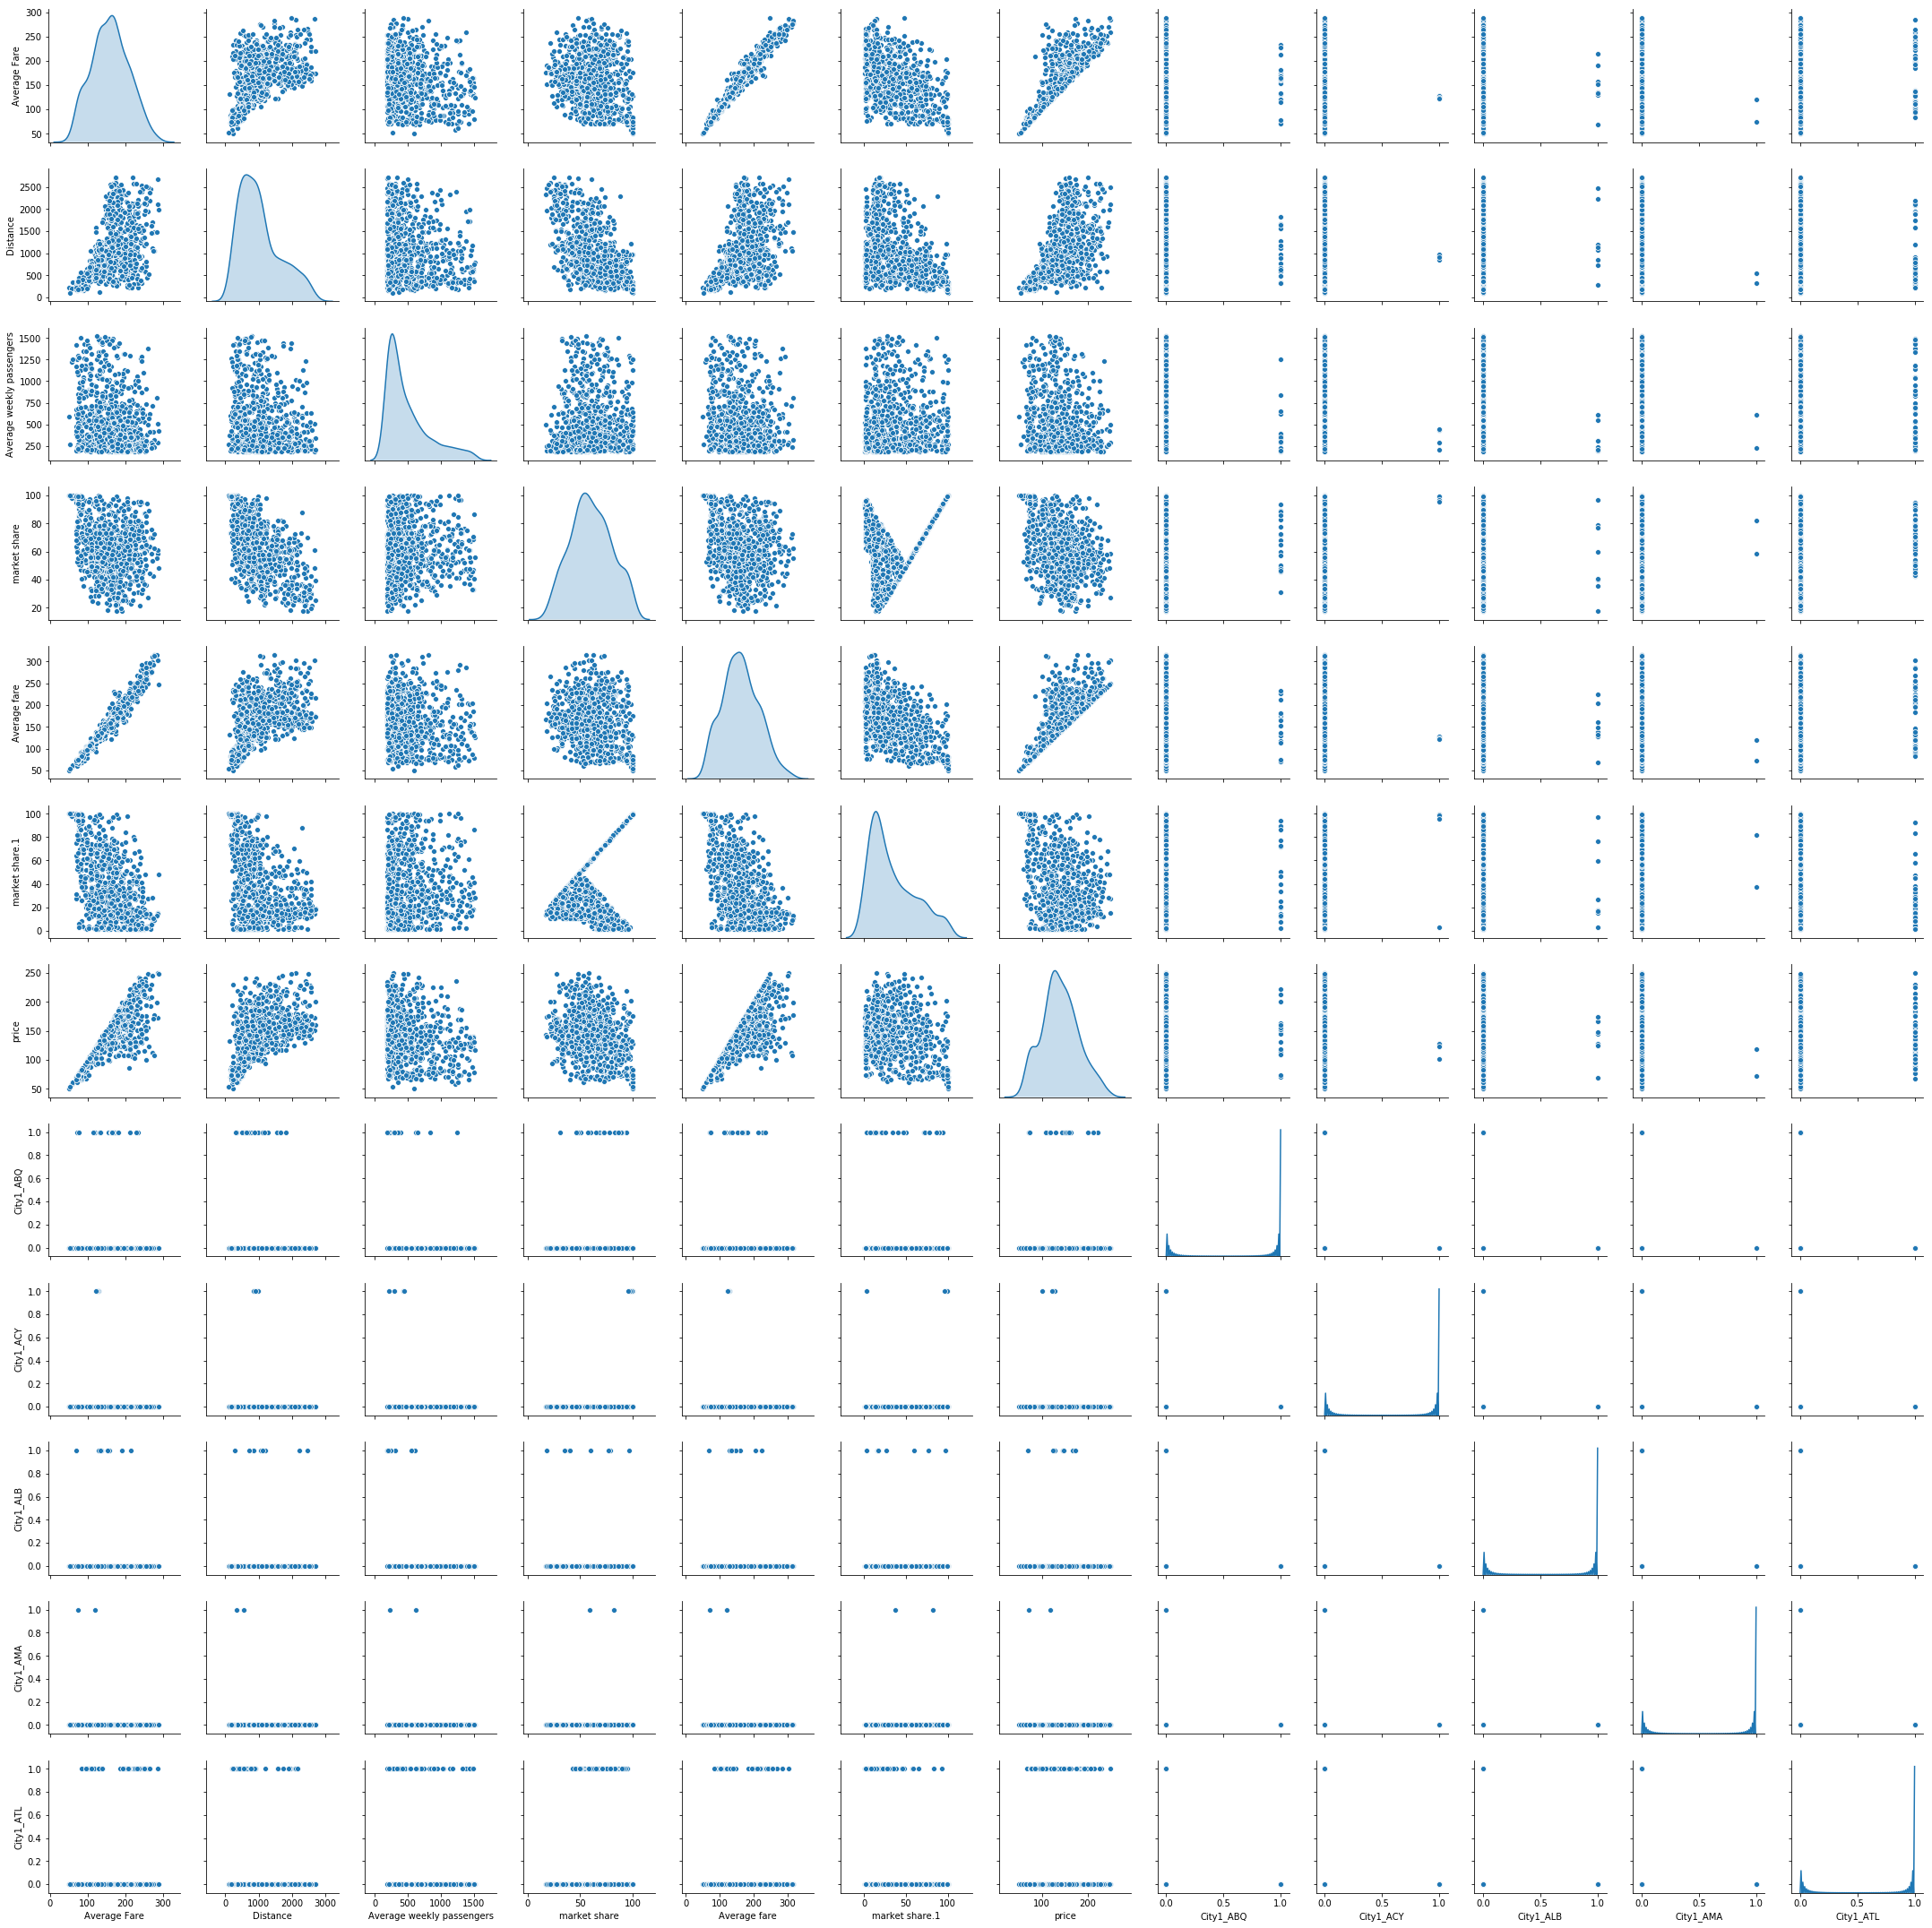

In [59]:
# Question 4
# Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

# step 1 - plot and analyse the correlation between variables

import seaborn as sns
airr= air1.iloc[:,0:12];
sns.pairplot(airr, diag_kind='kde')



In [60]:
# Drop the Independent variables with less than 0.1 correlation with the Dependent variable

# calculate the correlation between the dependent variable and each independent variable to identify if any columns to be removed


a= list(air1);
a

## Removes all columns with correlation >=0.1 or <=0.1

for i in a:
    if((Y.corr(air1[i])<=0.1) | (Y.corr(air1[i])<=-0.1)):
        air1=air1.drop(columns=[i])

air1




,Average Fare,Distance,Average fare,price,City1_BOS,City1_CLT,City1_DFW,City1_DTW,City1_MSP,City2_IAD,City2_MSP,City2_PHL,market leading airline_AA,market leading airline_CO,market leading airline_NW,market leading airline_UA,Low price airline_AA,Low price airline_CO,Low price airline_UA,Low price airline_US
0,114.47,528,111.03,111.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,122.47,860,123.09,118.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,214.42,852,223.98,167.12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,69.40,288,68.86,68.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,158.13,723,161.36,145.42,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,135.17,1204,137.97,127.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,152.85,2237,148.59,148.59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,190.73,2467,205.06,174.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,129.35,1073,127.69,127.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,134.17,1130,132.91,124.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
## To see correlation between variables at once

air1.corr()

,Average Fare,Distance,Average fare,price,City1_BOS,City1_CLT,City1_DFW,City1_DTW,City1_MSP,City2_IAD,City2_MSP,City2_PHL,market leading airline_AA,market leading airline_CO,market leading airline_NW,market leading airline_UA,Low price airline_AA,Low price airline_CO,Low price airline_UA,Low price airline_US
Average Fare,1.000000,0.522650,0.979713,0.840993,0.155560,0.115008,0.145862,0.109660,0.155000,0.135907,0.174125,0.106421,0.277860,0.151924,0.266191,0.110306,0.151990,0.109374,0.164161,0.157995
Distance,0.522650,1.000000,0.489721,0.539894,0.077171,-0.026476,-0.045843,0.015264,0.037957,-0.002233,-0.034640,-0.013424,0.119035,0.017668,0.018086,0.096996,0.182103,0.064484,-0.015153,-0.031277
Average fare,0.979713,0.489721,1.000000,0.794157,0.171203,0.114383,0.149405,0.111062,0.167569,0.129088,0.194640,0.102762,0.250394,0.167761,0.291293,0.155717,0.130807,0.101272,0.168584,0.151201
price,0.840993,0.539894,0.794157,1.000000,0.059521,0.123964,0.157128,0.043234,0.101948,0.078515,0.005504,0.125792,0.300766,0.156872,0.090154,0.095021,0.247088,0.057458,0.098144,0.093087
City1_BOS,0.155560,0.077171,0.171203,0.059521,1.000000,-0.024596,-0.043861,-0.035689,-0.027746,-0.033858,0.011820,0.013529,0.016326,-0.000842,0.007839,-0.008627,0.022600,0.015751,0.007266,0.077282
City1_CLT,0.115008,-0.026476,0.114383,0.123964,-0.024596,1.000000,-0.030746,-0.025017,-0.019449,0.026277,0.037043,0.038934,-0.026776,-0.035411,0.020934,-0.038482,0.029007,-0.029673,-0.032470,0.068379
City1_DFW,0.145862,-0.045843,0.149405,0.157128,-0.043861,-0.030746,1.000000,-0.044612,-0.034683,-0.042324,-0.036505,-0.001355,0.410575,-0.063146,-0.072796,-0.068623,0.079285,-0.052915,0.051313,-0.047677
City1_DTW,0.109660,0.015264,0.111062,0.043234,-0.035689,-0.025017,-0.044612,1.000000,-0.028221,0.000674,0.010677,0.012383,-0.075822,-0.026933,0.482755,-0.055837,-0.035551,-0.043056,0.005632,0.014110
City1_MSP,0.155000,0.037957,0.167569,0.101948,-0.027746,-0.019449,-0.034683,-0.028221,1.000000,0.017765,-0.023092,0.029932,-0.036256,-0.039945,0.448940,-0.043410,-0.032933,-0.033473,0.030278,0.050147
City2_IAD,0.135907,-0.002233,0.129088,0.078515,-0.033858,0.026277,-0.042324,0.000674,0.017765,1.000000,-0.028180,-0.027485,0.003227,0.002611,0.012119,-0.005135,-0.010553,-0.010823,0.010705,0.105304


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002824E1E2BA8>,
      dtype=object)

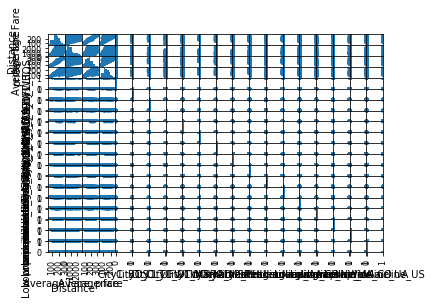

In [62]:
# Question 5
# Scatter plot between dependent and independent variable

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Matrix helps plotting versus each variable

pd.plotting.scatter_matrix(air1, alpha=1)


In [64]:
# Qustion 7
# Divide the data set into training and test data set and build a Multiple Linear Regression model.


## Splitting into 80:20 ratio for training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

## Size of Training & Test sets of X frame
print (X_train.shape, X_test.shape);

## Size of Training & Test sets of Y frame
print (Y_train.shape, Y_test.shape);


## Model

lr = LinearRegression()
lr.fit(X_train, Y_train)

(708, 215) (177, 215)
(708,) (177,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
# Question 8

## Finding the coefficients of each feature

  
coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
print (coeff)


# Intercept
print ("Y Intercept is", lr.intercept_);

                            Coefficient
Distance                   3.922274e-03
Average weekly passengers -6.579775e-03
market share               7.304912e-02
Average fare               6.993745e-01
market share.1            -3.642836e-02
price                      2.047954e-01
City1_ABQ                  1.182758e+08
City1_ACY                  1.182758e+08
City1_ALB                  1.182758e+08
City1_AMA                  1.182758e+08
City1_ATL                  1.182758e+08
City1_AUS                  1.182758e+08
City1_BDL                  1.182758e+08
City1_BHM                  1.182758e+08
City1_BNA                  1.182758e+08
City1_BOI                  1.182758e+08
City1_BOS                  1.182758e+08
City1_BTV                  1.182758e+08
City1_BUF                  1.182758e+08
City1_BUR                  1.182758e+08
City1_BWI                  1.182758e+08
City1_CAE                  4.186105e+08
City1_CAK                  1.182758e+08
City1_CHS                  1.182758e+08


In [66]:
# Question 9
# Accuracy of the model

## Predicting Y for the test dataset

Y_pred= lr.predict(X_test);

## predict Y for the training dataset

Y_predt= lr.predict(X_train);

## Accuracy Score for the model

from sklearn.metrics import accuracy_score;
accuracy_Score_training = lr.score(X_train, Y_train);
accuracy_Score_test = lr.score(X_test,Y_test);
print ("Accuracy in percent of training set",accuracy_Score_training*100);
print ("Accuracy in percent of test set",accuracy_Score_test*100);

Accuracy in percent of training set 98.41482666184312
Accuracy in percent of test set -1056079896506438.5
